<a href="https://www.kaggle.com/code/syedasimalishah/eda-3d?scriptVersionId=108406334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


In [3]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_0.csv',dtype=dtypes)
#df2 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_1.csv',dtype=dtypes)
#df3 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_2.csv',dtype=dtypes)
#df4 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_3.csv',dtype=dtypes)
#df5 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_4.csv',dtype=dtypes)
#df6 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_5.csv',dtype=dtypes)

In [4]:
#df = pd.concat([df1,df2,df3,df4,df5,df6])

In [5]:
#del df1,df2,df3,df4,df5,df6

In [6]:
dft = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test.csv')

In [7]:
df= df.dropna()
df.shape

(1558499, 61)

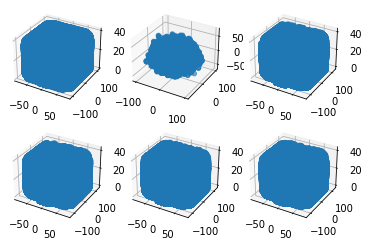

In [15]:
fig = plt.figure()
ax = fig.add_subplot(2,3,1,projection='3d')
ax.scatter(df['ball_pos_x'],df['ball_pos_y'],df['ball_pos_z'])
ax1 = fig.add_subplot(2,3,2,projection='3d')
ax1.scatter(df['ball_vel_x'],df['ball_vel_y'],df['ball_vel_z'])
ax2 = fig.add_subplot(2,3,3,projection='3d')
ax2.scatter(df['p0_pos_x'],df['p0_pos_y'],df['p0_pos_z'])
ax3 = fig.add_subplot(2,3,4,projection='3d')
ax3.scatter(df['p1_pos_x'],df['p1_pos_y'],df['p1_pos_z'])
ax4 = fig.add_subplot(2,3,5,projection='3d')
ax4.scatter(df['p2_pos_x'],df['p2_pos_y'],df['p2_pos_z'])
ax5 = fig.add_subplot(2,3,6,projection='3d')
ax5.scatter(df['p3_pos_x'],df['p3_pos_y'],df['p3_pos_z'])

In [24]:
df1 = df[df['team_A_scoring_within_10sec']==0].sample(2000000)
df2 = df[df['team_A_scoring_within_10sec']==1]
df3 = df[df['team_B_scoring_within_10sec']==1]
df = pd.concat([df1,df2,df3])
del df1,df2,df3

In [25]:
trainXA = df[['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x',
       'ball_vel_y', 'ball_vel_z', 'p0_pos_x', 'p0_pos_y', 'p0_pos_z',
       'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost', 'p1_pos_x', 'p1_pos_y',
       'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z', 'p1_boost', 'p2_pos_x',
       'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y', 'p2_vel_z', 'p2_boost',
       'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x', 'p3_vel_y', 'p3_vel_z',
       'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z', 'p4_vel_x', 'p4_vel_y',
       'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y', 'p5_pos_z', 'p5_vel_x',
       'p5_vel_y', 'p5_vel_z', 'p5_boost', 'boost0_timer', 'boost1_timer',
       'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer']]
trainYA = df[['team_A_scoring_within_10sec']]

In [26]:
trainXB = df[['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x',
       'ball_vel_y', 'ball_vel_z', 'p0_pos_x', 'p0_pos_y', 'p0_pos_z',
       'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost', 'p1_pos_x', 'p1_pos_y',
       'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z', 'p1_boost', 'p2_pos_x',
       'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y', 'p2_vel_z', 'p2_boost',
       'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x', 'p3_vel_y', 'p3_vel_z',
       'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z', 'p4_vel_x', 'p4_vel_y',
       'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y', 'p5_pos_z', 'p5_vel_x',
       'p5_vel_y', 'p5_vel_z', 'p5_boost', 'boost0_timer', 'boost1_timer',
       'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer']]

trainYB = df[['team_B_scoring_within_10sec']]

In [27]:
test = dft[['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x',
       'ball_vel_y', 'ball_vel_z', 'p0_pos_x', 'p0_pos_y', 'p0_pos_z',
       'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost', 'p1_pos_x', 'p1_pos_y',
       'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z', 'p1_boost', 'p2_pos_x',
       'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y', 'p2_vel_z', 'p2_boost',
       'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x', 'p3_vel_y', 'p3_vel_z',
       'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z', 'p4_vel_x', 'p4_vel_y',
       'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y', 'p5_pos_z', 'p5_vel_x',
       'p5_vel_y', 'p5_vel_z', 'p5_boost', 'boost0_timer', 'boost1_timer',
       'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer']]

In [28]:
test.fillna(test.mean(), inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
del df,dft

In [30]:
trainXA.shape

(3338335, 54)

In [32]:
from xgboost import XGBClassifier
modelA = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
modelA.fit(trainXA,trainYA)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5]
    }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=modelA, 
                           param_grid=param_grid, 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=3)
grid_result = grid_search.fit(trainXA,trainYA)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [33]:
modelB = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
modelB.fit(trainXB,trainYB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
A = modelA.predict(test)
B = modelB.predict(test)

In [35]:
ss = pd.read_csv('../input/tabular-playground-series-oct-2022/sample_submission.csv')

In [36]:
df = pd.DataFrame({'id':ss.id,'team_A_scoring_within_10sec':A,'team_B_scoring_within_10sec':B})

In [37]:
df.to_csv('SS7.csv',index = False)